In [1]:
import pandas as pd

In [2]:
import os

In [3]:
for dirname, _, filenames in os.walk('./dataset/linkedin-job-posting/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset/linkedin-job-posting/postings.csv
./dataset/linkedin-job-posting/.DS_Store
./dataset/linkedin-job-posting/mappings/skills.csv
./dataset/linkedin-job-posting/mappings/industries.csv
./dataset/linkedin-job-posting/mappings/.ipynb_checkpoints/skills-checkpoint.csv
./dataset/linkedin-job-posting/mappings/.ipynb_checkpoints/industries-checkpoint.csv
./dataset/linkedin-job-posting/.ipynb_checkpoints/postings-checkpoint.csv
./dataset/linkedin-job-posting/jobs/benefits.csv
./dataset/linkedin-job-posting/jobs/salaries.csv
./dataset/linkedin-job-posting/jobs/job_industries.csv
./dataset/linkedin-job-posting/jobs/job_skills.csv
./dataset/linkedin-job-posting/jobs/.ipynb_checkpoints/job_skills-checkpoint.csv
./dataset/linkedin-job-posting/jobs/.ipynb_checkpoints/benefits-checkpoint.csv
./dataset/linkedin-job-posting/jobs/.ipynb_checkpoints/salaries-checkpoint.csv
./dataset/linkedin-job-posting/jobs/.ipynb_checkpoints/job_industries-checkpoint.csv
./dataset/linkedin-job-posting/companies/

In [4]:
df_job_postings = pd.read_csv("./dataset/linkedin-job-posting/postings.csv")

In [5]:
df_job_postings.dtypes, df_job_postings.shape

(job_id                          int64
 company_name                   object
 title                          object
 description                    object
 max_salary                    float64
 pay_period                     object
 location                       object
 company_id                    float64
 views                         float64
 med_salary                    float64
 min_salary                    float64
 formatted_work_type            object
 applies                       float64
 original_listed_time          float64
 remote_allowed                float64
 job_posting_url                object
 application_url                object
 application_type               object
 expiry                        float64
 closed_time                   float64
 formatted_experience_level     object
 skills_desc                    object
 listed_time                   float64
 posting_domain                 object
 sponsored                       int64
 work_type               

In [6]:
assert df_job_postings.shape[0] >= 25000

In [7]:
instance = df_job_postings[:1]

In [8]:
instance

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0


In [9]:
instance.title

0    Marketing Coordinator
Name: title, dtype: object

In [10]:
instance.max_salary

0    20.0
Name: max_salary, dtype: float64

In [16]:
instance.max_salary, instance.med_salary, instance.min_salary

(0    20.0
 Name: max_salary, dtype: float64,
 0   NaN
 Name: med_salary, dtype: float64,
 0    17.0
 Name: min_salary, dtype: float64)

In [11]:
instance.skills_desc.to_string()

'0    Requirements: \\n\\nWe are seeking a College or ...'

In [12]:
pd.set_option('display.max_colwidth', None)

In [13]:
instance.skills_desc.to_string()

'0    Requirements: \\n\\nWe are seeking a College or Graduate Student (can also be completed with school) with a focus in Planning, Architecture, Real Estate Development or Management or General Business. Must be able to work in an extremely fast paced environment and able to multitask and prioritize.'

In [14]:
blank_counts_df_posting = df_job_postings.isna().sum()

In [15]:
blank_counts_df_posting

job_id                             0
company_name                    1719
title                              0
description                        7
max_salary                     94056
pay_period                     87776
location                           0
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
formatted_work_type                0
applies                       100529
original_listed_time               0
remote_allowed                108603
job_posting_url                    0
application_url                36665
application_type                   0
expiry                             0
closed_time                   122776
formatted_experience_level     29409
skills_desc                   121410
listed_time                        0
posting_domain                 39968
sponsored                          0
work_type                          0
currency                       87776
c

In [51]:
# TODO(mahdi): add more analysis on the blank data later
#   for example file correlation or do some PCA of sth similar 

In [52]:
# TODO(mahdi): add data preprocessing stage to clean up the data for each model and use-case
#   then for example use a data registy to keep different version of data for different tasks or models

In [53]:
# https://www.kaggle.com/code/tiffanyca/sustainability-jobs-on-linkedin-2023-2024

<Axes: title={'center': 'Top 20 Job Titles'}, xlabel='Job Title', ylabel='Frequency'>

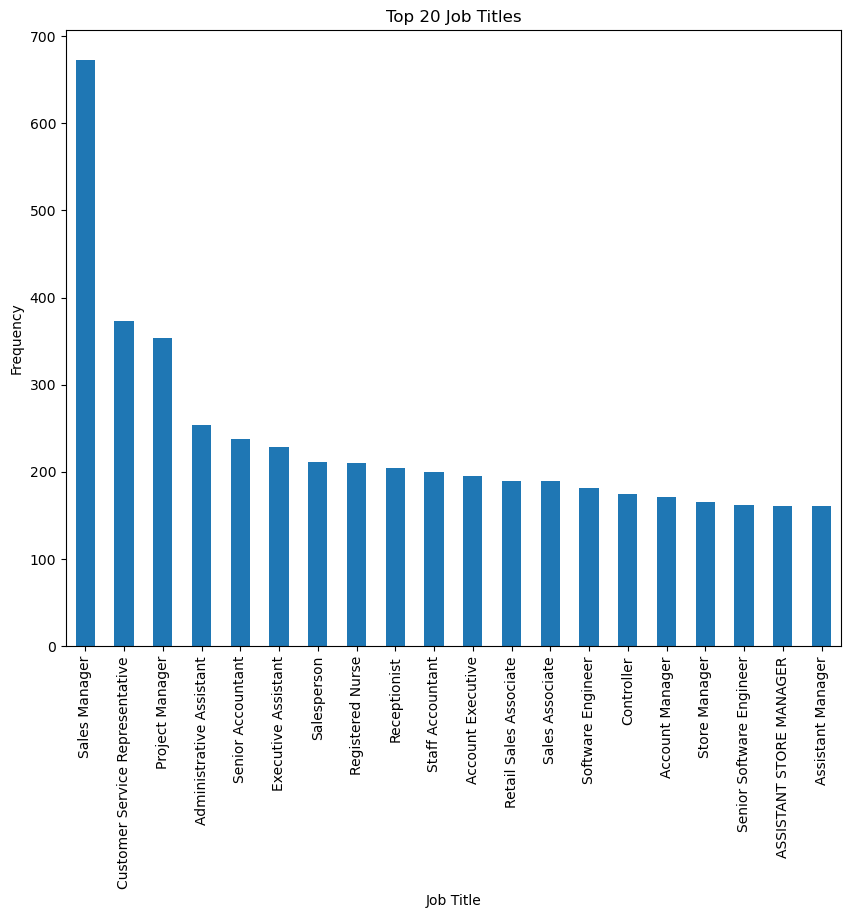

In [61]:
import matplotlib.pyplot as plt

df_job_postings['title'].value_counts().head(20).plot(kind='bar', title="Top 20 Job Titles"
    , xlabel="Job Title", ylabel="Frequency", figsize=(10, 8))

Font 'default' does not have a glyph for '\U0001f31f' [U+1f31f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f680' [U+1f680], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f30a' [U+1f30a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f31f' [U+1f31f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f680' [U+1f680], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f30a' [U+1f30a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f31f' [U+1f31f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f680' [U+1f680], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f30a' [U+1f30a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f31f' [U+1f31f], substituting with a dummy symbol.
Font 'defa

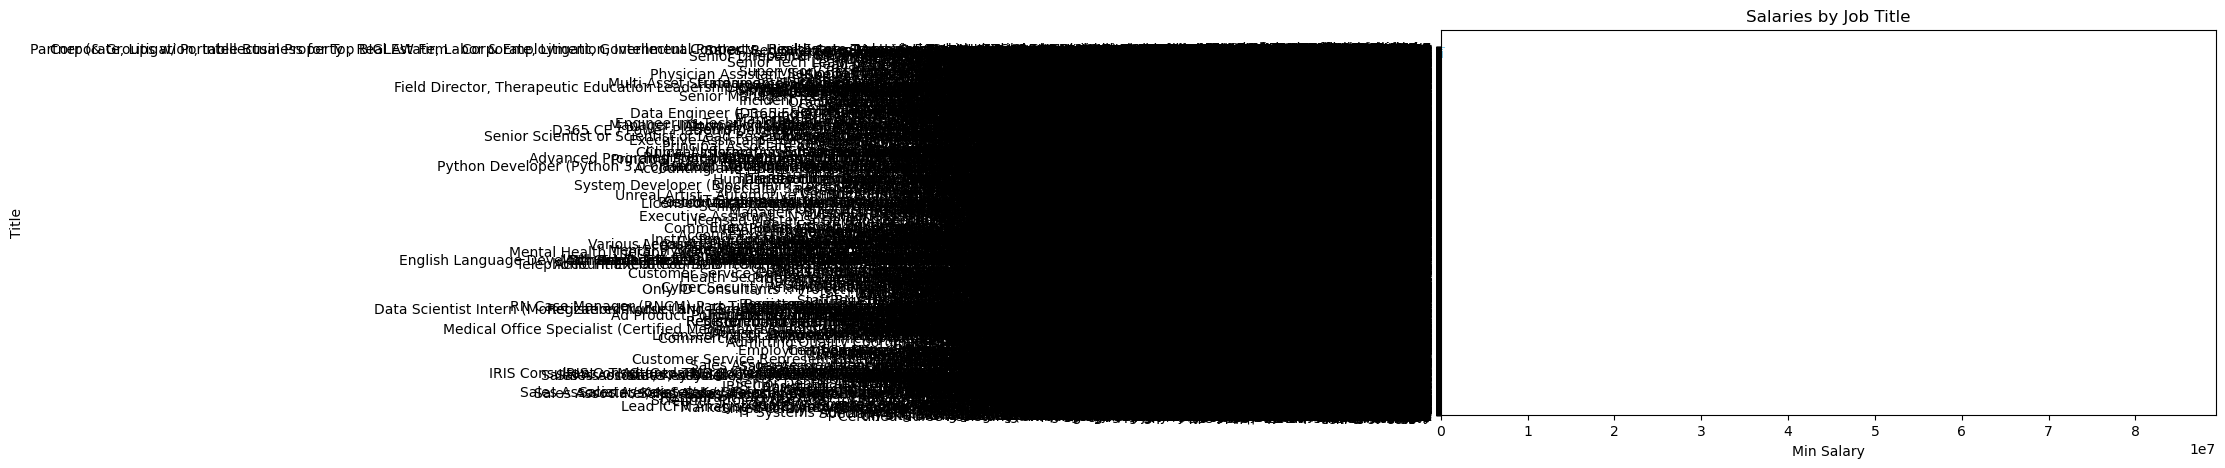

In [63]:
df = df_job_postings.sort_values(by='min_salary', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(df['title'], df['min_salary'], color='skyblue')
plt.xlabel('Min Salary')
plt.ylabel('Title')
plt.title('Salaries by Job Title')
plt.gca().invert_yaxis()  # Highest salary at the top
plt.show()